# 多层感知机的从零开始实现

我们已经在[多层感知机一节](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/03.multilayer-perceptrons/02.mlp.ipynb)中描述了多层感知机（MLP），
现在让我们尝试自己实现一个多层感知机。
为了与之前[softmax回归](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/02.linear-networks/06.softmax-regression-scratch.ipynb)
获得的结果进行比较，
我们将继续使用[Fashion-MNIST图像分类数据集](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/02.linear-networks/05.image-classification-dataset.ipynb)。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数

回想一下，Fashion-MNIST中的每个图像由
$28 \times 28 = 784$个灰度像素值组成。
所有图像共分为10个类别。
忽略像素之间的空间结构，
我们可以将每个图像视为具有784个输入特征
和10个类的简单分类数据集。
首先，我们将[**实现一个具有单隐藏层的多层感知机，
它包含256个隐藏单元**]。
注意，我们可以将这两个变量都视为超参数。
通常，我们选择2的若干次幂作为层的宽度。
因为内存在硬件中的分配和寻址方式，这么做往往可以在计算上更高效。

我们用几个张量来表示我们的参数。
注意，对于每一层我们都要记录一个权重矩阵和一个偏置向量。
跟以前一样，我们要为损失关于这些参数的梯度分配内存。

In [3]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

## 激活函数

为了确保我们对模型的细节了如指掌，
我们将[**实现ReLU激活函数**]
而不是直接调用内置的`relu`函数。

In [4]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

## 模型

因为我们忽略了空间结构，
所以我们使用`reshape`将每个二维图像转换为一个长度为
`num_inputs`的向量。
只需几行代码就可以（**实现我们的模型**）。

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1) # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

## 损失函数

由于我们已经[从零实现过softmax函数](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/02.linear-networks/06.softmax-regression-scratch.ipynb)，因此在这里我们使用高级API中的内置函数来计算softmax和交叉熵损失。回想一下我们之前对这些复杂问题的讨论。我们鼓励感兴趣的读者查看损失函数的源代码，以加深对实现细节的了解。

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

## 训练

幸运的是，[**多层感知机的训练过程与softmax回归的训练过程完全相同**]。
可以直接调用`d2l`包的`train_ch3`函数（参见[softmax回归的从零开始实现](https://github.com/lixinjie97/Deep_learning_tutorial/blob/main/02.linear-networks/06.softmax-regression-scratch.ipynb)），将迭代周期数设置为10，并将学习率设置为0.1.

(报错需要降低d2l的版本pip install d2l==0.17.5 --user，pip install numpy==1.22)。

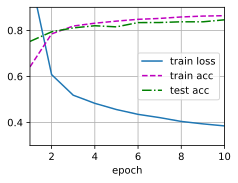

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

为了对学习到的模型进行评估，我们将[**在一些测试数据上应用这个模型**]

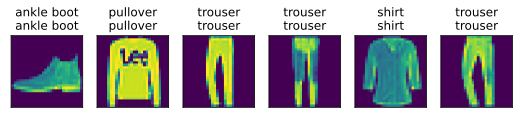

In [8]:
d2l.predict_ch3(net, test_iter)

## 小结

* 手动实现一个简单的多层感知机是很容易的。然而如果有大量的层，从零开始实现多层感知机会变得很麻烦（例如，要命名和记录模型的参数）。

## 练习

1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
1. 尝试添加更多的隐藏层，并查看它对结果有何影响。
1. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
1. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？
1. 描述为什么涉及多个超参数更具挑战性。
1. 如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。
1. 多层感知机中激活函数作用在哪。 

### 练习一

&emsp;&emsp;256到376范围内`num_hiddens`得到结果测试准确率在0.8和0.85附近震荡。取`num_hiddens=256`，能保证其他参数不变时得到最佳的结果。

&emsp;&emsp;以下使用`torch`编程进行实验：

In [1]:
import torch
from d2l import torch as d2l
from torch import nn

train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)

def initweight4_2_1(num_inputs=784, num_outputs=10, num_hiddens=256):
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2]
    return W1, b1, W2, b2, params

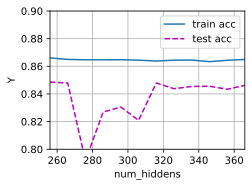

In [2]:
showtrain = 0  # 可以展示训练过程情况
num_inputs = 784
num_outputs = 10
num_hiddenslist = list(range(256, 376, 10))
animatornum_hiddens = d2l.Animator(xlabel='num_hiddens', ylabel='Y', xlim=[num_hiddenslist[0], num_hiddenslist[-1]], ylim=[0.8, 0.9], 
                                  legend=['train acc', 'test acc'])

for num_hiddens in num_hiddenslist:
    num_epochs, lr = 10, 0.1
    loss = nn.CrossEntropyLoss(reduction='none')
    W1, b1, W2, b2, params = initweight4_2_1(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)
    updater = torch.optim.SGD(params, lr=lr)
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@W1 + b1) # 这里“@”代表矩阵乘法
        return (H@W2 + b2)
    if showtrain == 1:
        animator = d2l.Animator(xlabel=f'epoch num_hiddens:{num_hiddens}', ylabel='Y', xlim=[1, num_epochs], ylim=[0.25, 0.9], legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if showtrain == 1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    print(f'num_hiddens={num_hiddens}, train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}')
    animatornum_hiddens.add(num_hiddens, (train_acc, test_acc))
    assert train_loss < 0.5, train_loss # assert语法：assert expression [, arguments] ，如果expression不成立，则输出arguments
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

### 练习二

&emsp;&emsp;在其他参数不变的情况下单纯增加隐藏层数会减少准确率。

&emsp;&emsp;以下使用`torch`编程进行实验：

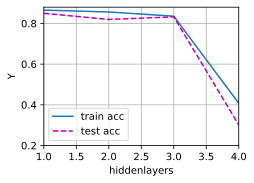

In [1]:
import torch
from d2l import torch as d2l
from torch import nn

train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)

def initweight4_2_2(num_inputs=784, num_outputs=10, num_hiddens=256, num_hiddenlayers=1):
    params = []
    for i in range(num_hiddenlayers):
        a = num_inputs if i==0 else num_hiddens
        b = num_hiddens
        params.append(nn.Parameter(torch.randn(a, b, requires_grad=True) * 0.01))
        params.append(nn.Parameter(torch.zeros(b, requires_grad=True)))
    params.append(nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01))
    params.append(nn.Parameter(torch.zeros(num_outputs, requires_grad=True)))
    return params
    
showtrain=0 # showtrain-1 可以展示训练过程的情况
num_inputs=784
num_outputs=10
num_hiddens = 256
num_hiddenlayerslist=list(range(1,5))
animatornum_hiddenlayers = d2l.Animator(xlabel='hiddenlayers',ylabel='Y',xlim=[num_hiddenlayerslist[0],num_hiddenlayerslist[-1]], ylim=[0.2, 0.88],
                        legend=[ 'train acc', 'test acc'])

for num_hiddenlayers in num_hiddenlayerslist:
    num_epochs, lr = 10, 0.1
    loss = nn.CrossEntropyLoss(reduction='none')
    params=initweight4_2_2(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens,num_hiddenlayers=num_hiddenlayers)
    updater = torch.optim.SGD(params, lr=lr)
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@params[0] + params[1])
        for i in range(2,2*num_hiddenlayers ,2):
            H = relu(H@(params[i]) + params[i+1])  # 这里“@”代表矩阵乘法
        return (H@(params[-2]) + params[-1])
    if showtrain==1:
        animator =d2l.Animator(xlabel=f'epoch num_hiddenlayers:{num_hiddenlayers}',ylabel='Y',xlim=[1, num_epochs], ylim=[0.25, 0.9],legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        if showtrain==1:
            animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    print(f'num_hiddenlayers={num_hiddenlayers}, train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}')
    animatornum_hiddenlayers.add(num_hiddenlayers, (train_acc, test_acc))

### 练习三

&emsp;&emsp;较大的学习速率可以让loss下降更快，在初期更快的训练模型，但也可能造成更新参数值过大，导致参数在最优解附近来回跳跃无法收敛或者收敛在错误的值，同时过小的学习率会要求更多的训练轮数以达到收敛。最理想的学习率不是固定值，而是一个随着训练次数衰减的变化的值，也就是在训练初期，学习率比较大，随着训练的进行，学习率不断减小，直到模型收敛。

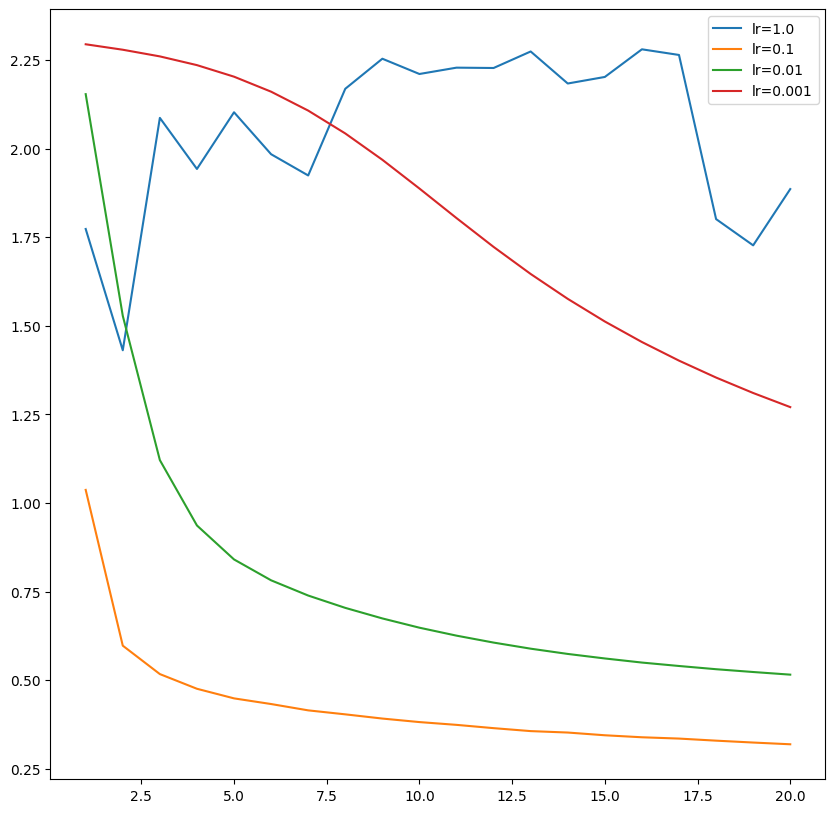

In [1]:
import torch
from d2l import torch as d2l
from torch import nn

listlr = [1.0, 0.1, 0.01, 0.001]
train_iter, test_iter = d2l.load_data_fashion_mnist(256, resize=None)
num_epochs=20
d2l.plt.figure(figsize=(10, 10))

def initweight4_2_1(num_inputs=784, num_outputs=10, num_hiddens=256):
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2]
    return W1, b1, W2, b2, params
    
for lr in listlr:
    num_inputs=784; num_outputs=10; num_hiddens = 256;
    W1,b1,W2,b2, params=initweight4_2_1()
    updater = torch.optim.SGD(params, lr=lr)
    loss = nn.CrossEntropyLoss(reduction='none')
    epoch_loss=[]
    def relu(X):
        a = torch.zeros_like(X)
        return torch.max(X, a)
    def net(X):
        X = X.reshape((-1, num_inputs))
        H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
        return (H@W2 + b2)
    
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        
        
        epoch_loss.append(train_metrics[0])
    train_loss, train_acc = train_metrics
    d2l.plt.plot(range(1,num_epochs+1), epoch_loss,label= (f'lr={lr}') )

d2l.plt.legend()  # 显示图例
d2l.plt.show()  # 显示图像

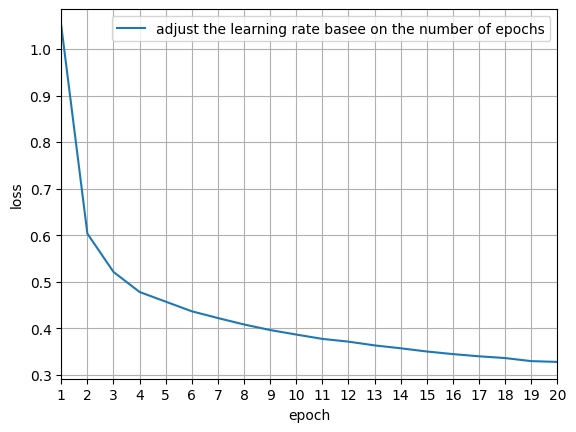

In [2]:
# 补充 关于学习率的动态调整算法，可参考pytorch官方文档：https://pytorch.org/docs/stable/optim.html
# 下面以指数衰减策略为例调整学习率
num_inputs = 784; num_outputs = 10; num_hiddens = 256;
W1, b1, W2, b2, params = initweight4_2_1()
loss = nn.CrossEntropyLoss(reduction='none')

optimizer_ExpLR = torch.optim.SGD(params, lr=0.1) # 定义一个优化器，初始学习率为0.1
# 定义指数衰减学习率调度器，根据给定的衰减率 gamma 对优化器的学习率进行指数衰减
scheduler_ExpLR = torch.optim.lr_scheduler.ExponentialLR(optimizer_ExpLR, gamma=0.99) 

epoch_loss = []

def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, optimizer_ExpLR)
    scheduler_ExpLR.step()
    test_acc = d2l.evaluate_accuracy(net, test_iter)

    epoch_loss.append(train_metrics[0])

train_loss, train_acc = train_metrics
d2l.plt.plot(range(1, num_epochs+1), epoch_loss, label='adjust the learning rate basee on the number of epochs')

d2l.plt.xlim(1, num_epochs)
d2l.plt.xticks(list(range(1, num_epochs+1)))
d2l.plt.xlabel('epoch')
d2l.plt.ylabel('loss')
d2l.plt.grid()
d2l.plt.legend()
d2l.plt.show()

### 练习四

&emsp;&emsp;考虑隐藏层数固定为1,学习轮数固定为10,每层的隐藏单元数在（256，128，64 ,32,16）中选取，学习率在（0.0001,0.001,0.01,0.1,1)范围内选取，batch_size(批大小)在（512,256,128,64,32,16）范围内选取的超参数优化。以下展示部分实验数据(由于训练的随机性后面展示的结果得到的数据与此表格会有一些不相符）


| num_epochs | batch_size |  lr  | num_hiddens | test_acc | train_acc | train_loss  |
| ---------- | ---------- | :--: | ----------- | -------- | --------- | ----------- |
| 10         | 256        | 0.1  | 32          | 0.8459   | 0.854367  | 0.41196403  |
| 10         | 128        | 0.1  | 256         | 0.8629   | 0.8808833 | 0.33219405  |
| 10         | 64         | 0.1  | 256         | 0.8769   | 0.89346   | 0.291003041 |
| 10         | 32         | 0.1  | 256         | 0.8865   | 0.9014    | 0.26649176  |
| 10         | 16         | 0.1  | 512         | 0.8824   | 0.90453   | 0.2544131   |

&emsp;&emsp;展示最优结果训练过程和数据

epochs=10,num_hiddens=256,lr=0.1,batch_size=32,train_loss=0.2660522242069244, train_acc=0.901,test_acc=0.8766


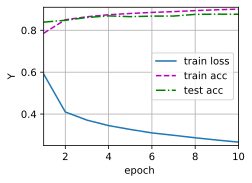

In [4]:
num_inputs,num_outputs,num_hiddens=784,10,256
num_epochs, lr, batch_size = 10, 0.1,32
loss = nn.CrossEntropyLoss(reduction='none')
W1,b1,W2,b2, params=initweight4_2_1(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)#initweight4_2_1定义见4.2.1
updater = torch.optim.SGD(params, lr=lr)
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel=f'epoch ',ylabel='Y', xlim=[1, num_epochs], ylim=[0.25, 0.91],
                legend=['train loss', 'train acc', 'test acc'])
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss,   updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
        
    animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
assert train_loss < 0.5, train_loss
assert train_acc <= 1 and train_acc > 0.7, train_acc
assert test_acc <= 1 and test_acc > 0.7, test_acc
print(f'epochs={num_epochs},num_hiddens={num_hiddens},lr={lr},batch_size={batch_size},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')

&emsp;&emsp;考虑隐藏层数固定为2，并取第二层隐藏层单元数的一半和10两个数中较大的值，学习轮数固定为10，第一层的隐藏单元数在（256，128，64 ,32,16）中选取，学习率在（0.0001,0.001,0.01,0.1,1)范围内选取，batch_size(批大小)在（512,256,128,64,32,16）范围内选取的超参数优化。以下展示部分实验数据(由于训练的随机性后面展示的结果得到的数据与此表格会有一些不相符）

| num_epochs | batch_size |  lr  | num_hiddens1 | num_hiddens2 | test_acc | train_acc | train_loss |
| ---------- | ---------- | :--: | ------------ | ------------ | -------- | --------- | ---------- |
| 10         | 256        | 0.1  | 512          | 256          | 0.8854   | 0.90515   | 0.24805    |
| 10         | 128        | 0.1  | 256          | 128          | 0.8822   | 0.9017166 | 0.25835    |
| 10         | 64         | 0.1  | 512          | 256          | 0.8811   | 0.90435   | 0.248654   |
| 10         | 32         | 0.1  | 512          | 256          | 0.8837   | 0.906683  | 0.2463282  |
| 10         | 16         | 0.1  | 512          | 256          | 0.8789   | 0.90626   | 0.24752787 |

&emsp;&emsp;展示最优结果训练过程和数据

epochs=10,num_hiddens=512,num_hiddens2=256,lr=0.1,batch_size=256,train_loss=0.38366707239151, train_acc=0.8625666666666667,test_acc=0.8464


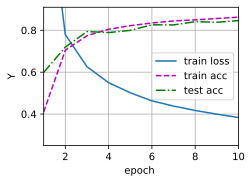

In [5]:
def initweight4_2_4(num_inputs=784, num_outputs=10, num_hiddens=256):
    num_hiddens2 = int(num_hiddens/2) if (num_hiddens/2)>10 else 10
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens, num_hiddens2, requires_grad=True) * 0.01)
    b2 = nn.Parameter(torch.zeros(num_hiddens2, requires_grad=True))
    W3 = nn.Parameter(torch.randn(num_hiddens2, num_outputs, requires_grad=True) * 0.01)
    b3 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
    params = [W1, b1, W2, b2, W3, b3]
    return W1, b1, W2, b2, W3, b3, params

num_inputs,num_outputs,num_hiddens=784,10,512
num_epochs, lr,batch_size = 10, 0.1,256
loss = nn.CrossEntropyLoss(reduction='none')
W1,b1,W2,b2,W3, b3, params=initweight4_2_4(num_inputs=num_inputs, num_outputs=num_outputs, num_hiddens=num_hiddens)
updater = torch.optim.SGD(params, lr=lr)
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)# 这里“@”代表矩阵乘法
    X2=H@W2 + b2
    H2 = relu(X2)
    return (H2@W3 + b3)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
animator = d2l.Animator(xlabel=f'epoch ',ylabel='Y', xlim=[1, num_epochs], ylim=[0.25, 0.91],
                legend=['train loss', 'train acc', 'test acc'])
for epoch in range(num_epochs):
    train_metrics = d2l.train_epoch_ch3(net, train_iter, loss,   updater)
    test_acc = d2l.evaluate_accuracy(net, test_iter)
        
    animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics

assert train_loss < 0.5, train_loss
assert train_acc <= 1 and train_acc > 0.7, train_acc
assert test_acc <= 1 and test_acc > 0.7, test_acc
print(f'epochs={num_epochs},num_hiddens={num_hiddens},num_hiddens2={int(num_hiddens/2) if (num_hiddens/2)>10 else 10},lr={lr},batch_size={batch_size},train_loss={train_loss}, train_acc={train_acc},test_acc={test_acc}')

### 练习五

&emsp;&emsp;超参数无法通过常规的优化手段确定，每次调整超参数要依据训练结果导致调整一次需要的成本很大，而过多的超参数将导致更多的参数组合，使得通过训练来确定好最优的超参数很困难。

### 练习六

&emsp;&emsp;超参数无法通过常规的优化手段确定，每次调整超参数要依据训练结果导致调整一次需要的成本很大，而过多的超参数将导致更多的参数组合，使得通过训练来确定好最优的超参数很困难。根据过往的经验（文献或以前的实践）选定好一组超参数，从调整后计算成本最小的参数入手确定好它的值以后，再去确定计算成本比它大一点的参数，一步确定一个超参数，最后得到所有超参数的值，然后重复之前的步骤直到结果满意为止。

### 练习七

&emsp;&emsp;多层感知机中激活函数作用在哪?

&emsp;&emsp;在多层感知机（Multilayer Perceptron, MLP）中，激活函数起着至关重要的作用。多层感知机一种前馈人工神经网络，它由多层节点（或称为神经元）组成，每一层都与下一层相连。激活函数主要应用在以下两个方面：

1. 隐藏层（Hidden Layers）：在多层感知机的每个隐藏层中，激活函数应用于线性变换的结果上。具体来说，对于每个隐藏层，输入数据首先被乘以权重矩阵，然后加上一个偏置项，得到一个线性组合。这个线性组合就是激活函数的输入。激活函数的作用是引入非线性，使得网络能够学习和模拟更加复杂的函数映射关系。没有激活函数，无论网络有多少层，其表达能力都相当于一个单层感知机，因为线性变换的叠加仍然是线性的。
2. 输出层（Output Layer）：在输出层，激活函数的选择取决于具体的任务类型。例如：
   对于二元分类任务，通常使用sigmoid函数，它将任意实数映射到(0, 1)区间，表示概率。
   对于多分类任务，可以使用softmax函数，它将一个向量映射到一个概率分布上，其中每个元素的值都在(0, 1)区间，并且所有元数的和为1。
   对于回归任务，通常不使用激活函数，或这使用线性激活函数，直接输出预测值。
   
   常见的激活函数包括：
   Sigmoid、Tanh（双曲正切）、ReLU（线性修正单元）、Leaky ReLU、Softmax

   选择哪种激活函数取决于具体的应用场景和网络结构的设计。激活函数的设计和选择对网络的性能有xian
   